In [53]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from matplotlib.pyplot import imshow


In [54]:
keras.datasets.mnist.load_data()

((array([[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         ...,
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0

In [55]:
(X_train,y_train),(X_test,y_test)=keras.datasets.mnist.load_data()

In [56]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)


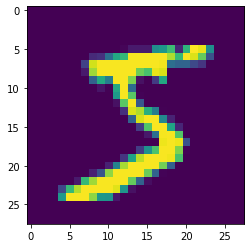

In [57]:
imshow(X_train[0])

In [58]:
y_train[0]

5

In [59]:
X_train = X_train.reshape(60000,784).astype('float32')
X_test = X_test.reshape(10000,784).astype('float32')

In [60]:
print(X_train.shape)
print(X_test.shape)

(60000, 784)
(10000, 784)


In [61]:
X_train /= 255
X_test /= 255
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

60000 train samples
10000 test samples


In [62]:
# convert class vectors to binary class matrices
y_train_dummy = keras.utils.to_categorical(y_train,num_classes=None)
y_test_dummy = keras.utils.to_categorical(y_test,num_classes=None)

In [63]:
y_train_dummy.shape

(60000, 10)

In [65]:
y_train_dummy[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

# Establish CNN model

In [66]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(20, activation='relu', input_shape=(784,)))
model.add(tf.keras.layers.Dense(20, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 20)                15700     
_________________________________________________________________
dense_4 (Dense)              (None, 20)                420       
_________________________________________________________________
dense_5 (Dense)              (None, 10)                210       
Total params: 16,330
Trainable params: 16,330
Non-trainable params: 0
_________________________________________________________________


# training model

In [68]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='Adam',
              metrics=['accuracy'])
batch_size = 128
num_classes = 10
epochs = 20
history = model.fit(X_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 1s 28us/sample - loss: 0.7253 - accuracy: 0.7766 - val_loss: 0.3047 - val_accuracy: 0.9165
Epoch 2/20
48000/48000 [==============================] - 1s 22us/sample - loss: 0.2834 - accuracy: 0.9198 - val_loss: 0.2393 - val_accuracy: 0.9343
Epoch 3/20
48000/48000 [==============================] - 2s 49us/sample - loss: 0.2346 - accuracy: 0.9329 - val_loss: 0.2173 - val_accuracy: 0.9407
Epoch 4/20
48000/48000 [==============================] - 2s 46us/sample - loss: 0.2118 - accuracy: 0.9391 - val_loss: 0.1989 - val_accuracy: 0.9442
Epoch 5/20
48000/48000 [==============================] - 2s 36us/sample - loss: 0.1933 - accuracy: 0.9444 - val_loss: 0.1902 - val_accuracy: 0.9473
Epoch 6/20
48000/48000 [==============================] - 2s 34us/sample - loss: 0.1802 - accuracy: 0.9477 - val_loss: 0.1838 - val_accuracy: 0.9490
Epoch 7/20
48000/48000 [==============================] 

In [69]:
import matplotlib.pyplot as plt
def show_train_history(train_acc,test_acc):
    plt.plot(history.history[train_acc])
    plt.plot(history.history[test_acc])
    plt.title('Train History')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

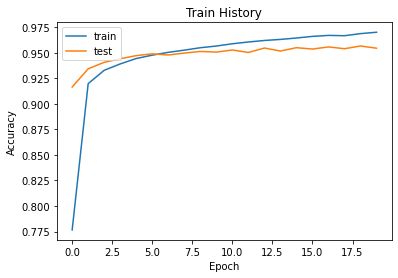

In [70]:
show_train_history('accuracy','val_accuracy')

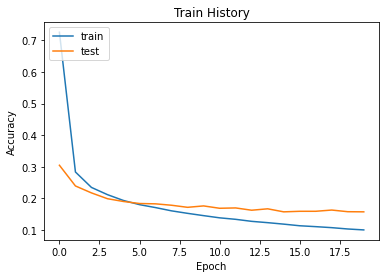

In [71]:
show_train_history('loss','val_loss')

In [72]:

scores = model.evaluate(X_test , y_test)
scores[1]

10000/10000 [==============================] - 0s 30us/sample - loss: 0.1523 - accuracy: 0.9584


0.9584

# 預測結果

In [73]:
prediction=model.predict_classes(X_test)
prediction

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [74]:
X_testre=X_test.reshape(10000,28,28,1).astype('float32')


In [75]:
y_train[0]

5

In [76]:
def plot_images_labels_prediction(images,labels,prediction,idx,num=10):
    fig = plt.gcf()
    fig.set_size_inches(12, 14)
    if num>25: num=25 
    for i in range(0, num):
        ax=plt.subplot(5,5, 1+i)
        ax.imshow(images[idx], cmap='binary')

        ax.set_title("label=" +str(labels[idx])+
                     ",predict="+str(prediction[idx])
                     ,fontsize=10) 
        
        ax.set_xticks([]);ax.set_yticks([])        
        idx+=1 
    plt.show()

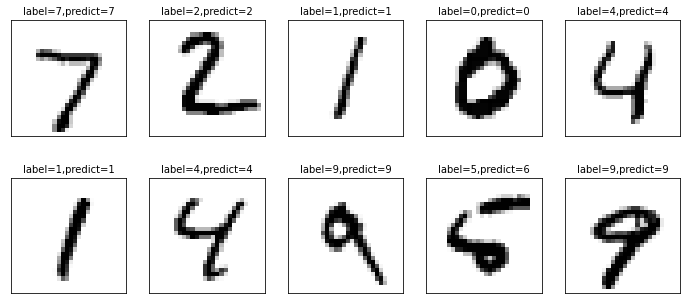

In [77]:
plot_images_labels_prediction(X_testre,y_test,prediction,idx=0)